In [76]:
poverty_file_path = "./Poverty_Rate/Poverty.csv"

# Skip metadata lines and read the actual data
poverty_rate = pd.read_csv(poverty_file_path, skiprows=6, names=["Neighborhood", "Year", "Data Format", "Poverty Rate", "FIPS"])

In [77]:
poverty_rate


,Neighborhood,Year,Data Format,Poverty Rate,FIPS
0,Battery Park/Tribeca,2011,Number,4213.30301,101
1,Greenwich Village,2011,Number,6219.69700,102
2,Lower East Side,2011,Number,45637.00000,103
3,Chelsea/Clinton,2011,Number,12252.00480,104
4,Midtown Business District,2011,Number,6131.99520,105
...,...,...,...,...,...
2205,Brooklyn,2022,Percent,0.19800,36047
2206,Manhattan,2022,Percent,0.17300,36061
2207,Queens,2022,Percent,0.13000,36081
2208,Staten Island,2022,Percent,0.11000,36085


In [115]:
clean_poverty = poverty_rate.loc[poverty_rate["Data Format"].str.contains("Percent", case=False, na=False)]

clean_poverty = clean_poverty.drop(columns=["Data Format"])
clean_poverty = clean_poverty.drop(columns=["FIPS"])
clean_poverty["Poverty Rate"] = clean_poverty["Poverty Rate"]*100
clean_poverty = clean_poverty.sort_values('Year')

In [116]:
clean_poverty


,Neighborhood,Year,Poverty Rate
862,East Tremont,2005,42.565
875,Sunset Park,2005,27.902
874,Park Slope,2005,11.222
873,East New York,2005,28.790
872,Bushwick,2005,34.025
...,...,...,...
2172,Bushwick,2022,19.900
2173,East New York,2022,24.600
2174,Park Slope,2022,9.300
2159,Morrisania,2022,38.400


In [121]:
clean_poverty.to_csv("./Poverty_Rate/poverty_rate.csv", index=False)
print("Exported to poverty_rate.csv ✅")

Exported to poverty_rate.csv ✅


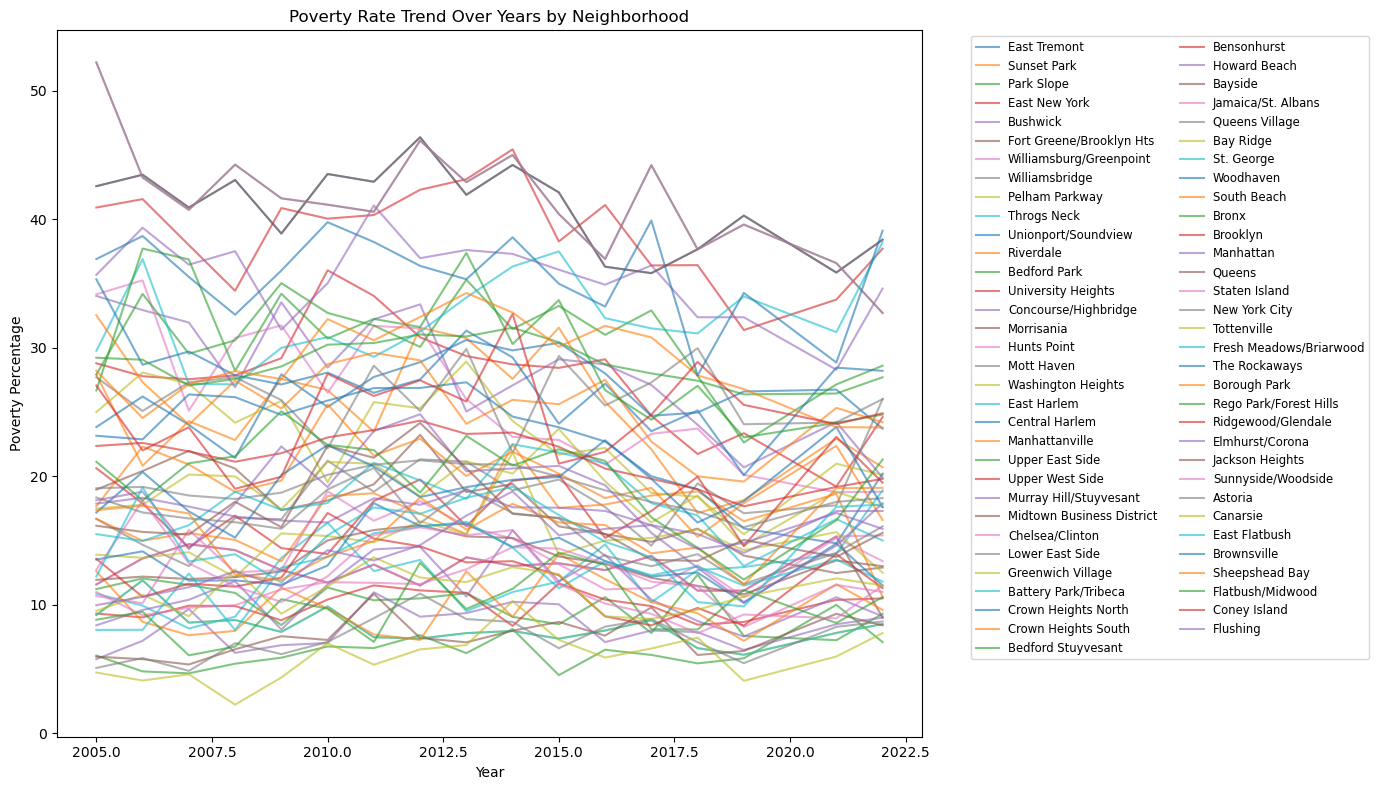

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot poverty rate trend lines for all neighborhoods
for neighborhood in pov_data["Neighborhood"].unique():
    neighborhood_data = pov_data[pov_data["Neighborhood"] == neighborhood]
    plt.plot(neighborhood_data["Year"], neighborhood_data["Poverty Rate"], label=neighborhood, alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Poverty Percentage")
plt.title("Poverty Rate Trend Over Years by Neighborhood")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.savefig("./Poverty_Rate/poverty_rate.png")
plt.show()


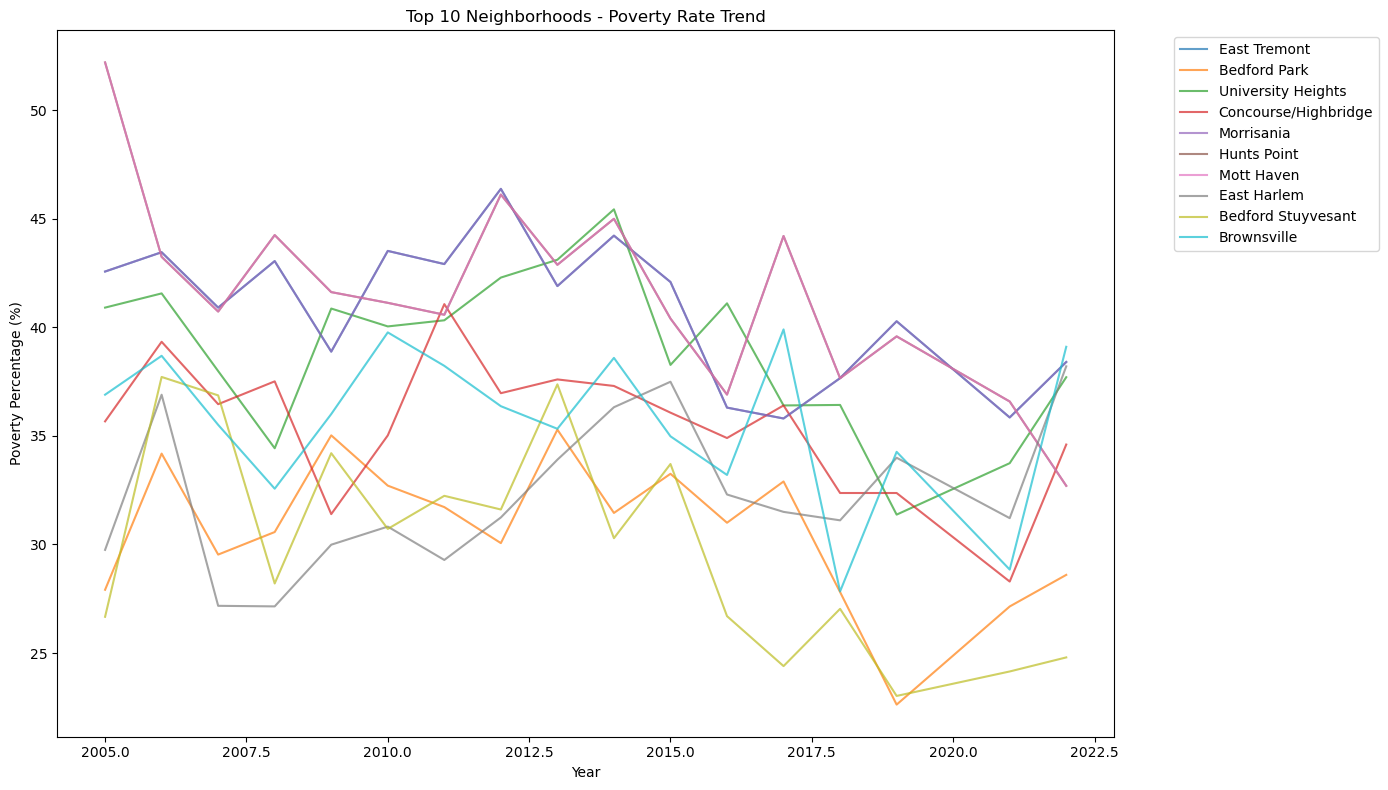

In [123]:
top10_neighborhoods = pov_data.groupby('Neighborhood')['Poverty Rate'].mean().nlargest(10).index
filtered_data = pov_data[pov_data['Neighborhood'].isin(top10_neighborhoods)]

plt.figure(figsize=(14, 8))
for neighborhood in filtered_data["Neighborhood"].unique():
    neighborhood_data = filtered_data[filtered_data["Neighborhood"] == neighborhood]
    plt.plot(neighborhood_data["Year"], neighborhood_data["Poverty Rate"], label=neighborhood, alpha=0.7)

plt.xlabel("Year")
plt.ylabel("Poverty Percentage (%)")
plt.title("Top 10 Neighborhoods - Poverty Rate Trend")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("./Poverty_Rate/top10_poverty_plot.png", dpi=300)

plt.show()


In [124]:
pov_data["Neighborhood"].unique()

array(['East Tremont', 'Sunset Park', 'Park Slope', 'East New York',
       'Bushwick', 'Fort Greene/Brooklyn Hts', 'Williamsburg/Greenpoint',
       'Williamsbridge', 'Pelham Parkway', 'Throgs Neck',
       'Unionport/Soundview', 'Riverdale', 'Bedford Park',
       'University Heights', 'Concourse/Highbridge', 'Morrisania',
       'Hunts Point', 'Mott Haven', 'Washington Heights', 'East Harlem',
       'Central Harlem', 'Manhattanville', 'Upper East Side',
       'Upper West Side', 'Murray Hill/Stuyvesant',
       'Midtown Business District', 'Chelsea/Clinton', 'Lower East Side',
       'Greenwich Village', 'Battery Park/Tribeca', 'Crown Heights North',
       'Crown Heights South', 'Bedford Stuyvesant', 'Bensonhurst',
       'Howard Beach', 'Bayside', 'Jamaica/St. Albans', 'Queens Village',
       'Bay Ridge', 'St. George', 'Woodhaven', 'South Beach', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'New York City', 'Tottenville', 'Fresh Meadows/Briarwood',
